# B.5 Time-evolving scenario discovery for infrastructure pathways

The purpose of this tutorial is to explore time-evolving vulnerability for systems that dynamically adapt to changing conditions. Using an example from water supply planning, we'll first examine how performance of a dynamic infrastructure pathway policy changes over time, then use factor mapping (main text Chapter 4.3) to understand which combinations of uncertaities generate vulnerability for two water utilities. Next, we'll perform factor prioritization (main text Chapter 4.3) to determine which uncertainties have the most influence on water supply performance. Finally, we'll provide an open platform to explore vulnerability across multiple measures of performance and different combinations of uncertainties.


## B5.1 Background

The Bedford-Greene metropolitan area (Figure 1) is a stylized water resources test case where two urban water utilities seek to develop an infrastructure and investment and management strategy to confront growing demands and changing climate. The utilities have agreed to jointly construct a new water treatment plant on Lake Classon, a large regional resource. Both utilities have also identified a set of individual infrastructure options to construct if necessary.

![Figure 1](Map_small.png)

The utilities are formulating a cooperative and adaptive regional management strategy that uses a risk-of-failure (ROF) metric to trigger both short term drought mitigation actions (water use restrictions and treated transfers between utilities) and long-term infrastructure investment decisions (shown in Figure 2a). Both utilities have specified a set of risk triggers and developed a construction order for available infrastructure options.

The utilities have run a Monte Carlo simulation to evaluate how these policies respond to a wide array of future states of the world, each representing a different sample of uncertainties including demand growth rates, changes to streamflows and financial variables.

The ROF-based policies respond to each SOW by generating a unique infrastructure pathway - a sequence of infrastructure investment decisions over time. Infrastructure pathways for the two utilities are shown in Figure 2b.

![Figure 2](PolicyandPathways.png)

## B 5.2 Evaluating Robustness over time

The two water utilities are interested in mainting both supply reliability and financial stability across the broadest set of plausible future SOWs. To measure the performance of the infrastructure pathway policy, they've defined five critical performance criteria:

- Reliability > 99%
- Restriction Frequency < 20%
- Peak Financial Cost < 80% of annual revenue (a measure of debt service spending)
- Worst-case drought management cost < 10% of annual revenue (a measure of unexpected drought costs)
- Unit Cost of Expansion < \$5/kgal

To assess the robustness of the infrastructure pathway policy, the two utilities apply a satisficing metric, which measures the percentage of sampled SOWs where the pathway policy meets the peformance criteria:

$R =\frac{1}{N}\sum_{j=1}^{N}\Lambda_{\theta,j}$

Where, $\Lambda_{\theta,j}=
\begin{cases}
1, \quad \textrm{if}\ F(\theta)_{j}\leq \Phi_j \\
0, \quad \textrm{otherwise}
\end{cases}$

And $\Phi$ is a vector of performance criteria for utility $j$, $\theta$ is the portfolio and $N$ is the total number of sampled SOWs.

Below, we'll visualize how robustness for the two utilities evolves over the 45-year planning horizon.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from eBook_SD_helpers import check_rdm_meet_criteria, create_sd_input, plot_selected_tree_maps, get_factor_importances
import seaborn as sns

# load DU factors
rdm_factors = np.loadtxt('input_data/DU_Factors.csv', delimiter= ',')

# import the objective data across 1000 SOWs for three time periods
short_term_performance = np.loadtxt('input_data/Short_term_performance.csv', delimiter= ',')
mid_term_performance = np.loadtxt('input_data/Mid_term_performance.csv', delimiter = ',')
long_term_performance = np.loadtxt('input_data/Long_term_performance.csv', delimiter = ',')

satisficing_criteria = [.98, .2, .8, .1, 5]

# transform into SD input
short_term_SD_input = create_sd_input(short_term_performance, satisficing_criteria)
mid_term_SD_input = create_sd_input(mid_term_performance, satisficing_criteria)
long_term_SD_input = create_sd_input(long_term_performance, satisficing_criteria)

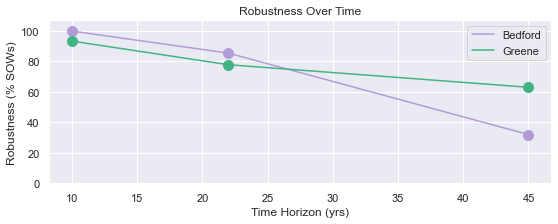

In [4]:
sns.set()
short_term_robustness = np.loadtxt('input_data/short_term_robustness.csv', delimiter= ',')
mid_term_robustness = np.loadtxt('input_data/mid_term_robustness.csv', delimiter = ',')
long_term_robustness = np.loadtxt('input_data/long_term_robustness.csv', delimiter = ',')

# plot robustness over time

fig =plt.figure(figsize=(9,3))
plt.plot([10,22,45], [short_term_robustness[5]*100, mid_term_robustness[5]*100,long_term_robustness[5]*100], c='#B19CD9')
plt.plot([10, 22, 45], [short_term_robustness[11]*100, mid_term_robustness[11]*100, long_term_robustness[11]*100], c= '#43b284')
plt.scatter([10,22,45], [short_term_robustness[5]*100, mid_term_robustness[5]*100,long_term_robustness[5]*100], s=100, c='#B19CD9')
plt.scatter([10, 22, 45], [short_term_robustness[11]*100, mid_term_robustness[11]*100, long_term_robustness[11]*100], s=100, c='#43b284')
plt.xlabel('Time Horizon (yrs)')
plt.ylabel('Robustness (% SOWs)')
plt.legend(['Bedford', 'Greene'])
plt.title('Robustness Over Time')
plt.ylim([0, 107])
plt.savefig('Robustness.png', dpi=300, bbox_inches='tight')


## B.5.3 Exploring performance evolution

The figure above reveals that the robustness of both water utilities degrades over time, with Bedford performance declineing further and more rapidly than Greene. This suggests that the proposed pathway policy is likely insufficient to meet the long-term needs of the two utilities. But how is the current policy insufficient? To answer that question we examine the performance measures that fail to meet performance criteria for each utility across the three planning horizons.

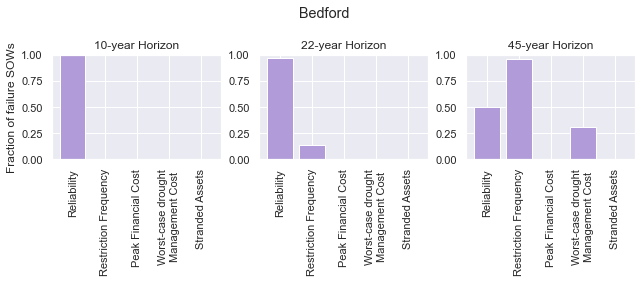

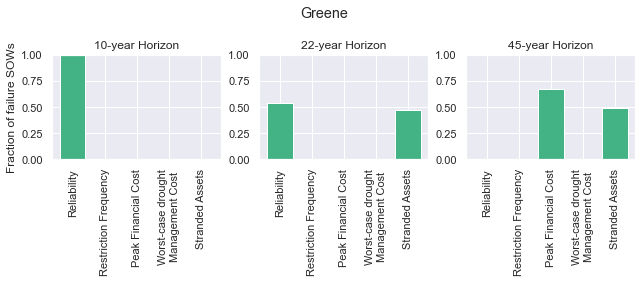

In [12]:
# Plot the type of vulnerability over time

### Bedford ###
plot_robustness_1 = np.zeros([3,5])
# Determine the percentage of failure SOWs that violate each criterion (note some SOWS fail multiple criteria, so this may some to >1)
criteria = ['Reliability', 'Restriction Frequency', 'Peak Financial Cost', 'Worst-case drought\nManagement Cost', 'Stranded Assets']
plot_robustness_1[0,:] = (1 - short_term_robustness[0:5])/(1-short_term_robustness[5])
plot_robustness_1[1,:] = (1 - mid_term_robustness[0:5])/(1-mid_term_robustness[5])
plot_robustness_1[2,:] = (1 - long_term_robustness[0:5])/(1-long_term_robustness[5])

# Plot over time
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,4))
axes[0].bar(np.arange(5), plot_robustness_1[0,:], color='#B19CD9')
axes[0].set_xticks(np.arange(5))
axes[0].set_xticklabels(criteria, rotation='vertical')
axes[0].set_ylim([0,1])
axes[0].set_title('10-year Horizon')
axes[0].set_ylabel('Fraction of failure SOWs')
axes[1].bar(np.arange(5), plot_robustness_1[1,:], color='#B19CD9')
axes[1].set_xticks(np.arange(5))
axes[1].set_xticklabels(criteria, rotation='vertical')
axes[1].set_ylim([0,1])
axes[1].set_title('22-year Horizon')
axes[2].bar(np.arange(5), plot_robustness_1[2,:], color='#B19CD9')
axes[2].set_xticks(np.arange(5))
axes[2].set_xticklabels(criteria, rotation='vertical')
axes[2].set_title('45-year Horizon')
axes[2].set_ylim([0,1])
fig.suptitle('Bedford')
plt.tight_layout()
plt.savefig('bedford_detailed_performance.png', dpi=500, bbox_inches='tight')

### Greene ###
# Determine the percentage of failure SOWs that violate each criterion (note some SOWS fail multiple criteria, so this may some to >1)
plot_robustness_2 = np.zeros([3, 5])
plot_robustness_2[0, :] = (1 - short_term_robustness[6:11]) / (1 - short_term_robustness[11])
plot_robustness_2[1, :] = (1 - mid_term_robustness[6:11]) / (1 - mid_term_robustness[11])
plot_robustness_2[2, :] = (1 - long_term_robustness[6:11]) / (1 - long_term_robustness[11])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes[0].bar(np.arange(5), plot_robustness_2[0, :], color='#43b284')
axes[0].set_xticks(np.arange(5))
axes[0].set_xticklabels(criteria, rotation='vertical')
axes[0].set_title('10-year Horizon')
axes[0].set_ylim([0,1])
axes[0].set_ylabel('Fraction of failure SOWs')
axes[1].bar(np.arange(5), plot_robustness_2[1, :], color='#43b284')
axes[1].set_xticks(np.arange(5))
axes[1].set_xticklabels(criteria, rotation='vertical')
axes[1].set_title('22-year Horizon')
axes[1].set_ylim([0,1])
axes[2].bar(np.arange(5), plot_robustness_2[2, :], color='#43b284')
axes[2].set_xticks(np.arange(5))
axes[2].set_xticklabels(criteria, rotation='vertical')
axes[2].set_title('45-year Horizon')
axes[2].set_ylim([0,1])
fig.suptitle('Greene')
plt.tight_layout()
plt.savefig('greene_detailed_performance.png', dpi=500, bbox_inches='tight')

We observe that the vulnerability of both utilities changes in different ways. Early in the simulation period, Bedford is vulnerable to failures in reliability (though the figure above reveals that these failures are very rare). As the simulation period progresses, Bedford's vulnerability expands to include failures in restriction frequency and worst-case cost. These failures indicate an overall inability by the water utility to manage drought conditions and future conditions progress.

Greene shows a very different evolution in vulnerability. Early in the simulation period, failures manifest in the reliability objective, suggesting that the utility may need more infrastructure to maintain reliable water supply. As the simulation progresses however, the vulnerability evolves. When evaluated across the 45-year planning horizon, the vulnerability to the reliability objective has dissapeared and a different failure mode has emerged - financial failure manifesting in peak financial cost and stranded assets. This suggests that the proposed pathway policy may be over-investing in new infrastructure, straining the utility's budget with large debt payments that are unncessary to maintain supply reliability. 

## B.5.4 How do deep uncertainties generate vulnerability

While the evolution of robustness provides insight into how the system evolves over time, it does not reveal why each utility is vulnerable. To examine how deep uncertainties generate vulnerability over time for the two utilities, we perform scenario discovery (factor mappin, Chapter 4.3). Here we'll utilize boosted trees to identify region's of the uncertainty space that cause the utilities to fail to meet performance criteria.


Factor map for Bedford
Factor map for Bedford
Factor map for Bedford
Factor map for Greene
Factor map for Greene
Factor map for Greene


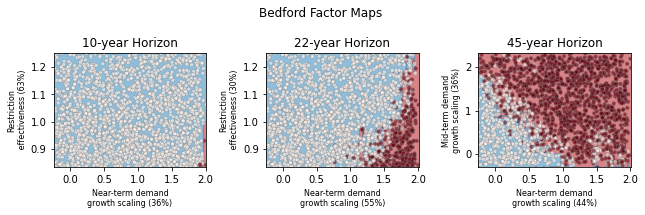

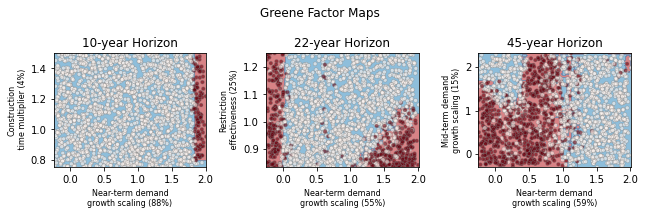

In [2]:
# factor mapping Bedford
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
plot_selected_tree_maps(5, 'Short_term', 0, 6, satisficing_criteria, 0, axes[0])
axes[0].set_title('10-year Horizon')
plot_selected_tree_maps(5, 'Mid_term', 0, 6, satisficing_criteria, 0, axes[1])
axes[1].set_title('22-year Horizon')
plot_selected_tree_maps(5, 'Long_term', 0, 1, satisficing_criteria, 0, axes[2])
axes[2].set_title('45-year Horizon')
fig.suptitle('Bedford Factor Maps')
plt.tight_layout()
plt.savefig('Bedford_factor_map.png', dpi=300)

# factor mapping Greene
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
plot_selected_tree_maps(11, 'Short_term', 0, 8, satisficing_criteria, 0, axes[0])
axes[0].set_title('10-year Horizon')
plot_selected_tree_maps(11, 'Mid_term', 0, 6, satisficing_criteria, 0, axes[1])
axes[1].set_title('22-year Horizon')
plot_selected_tree_maps(11, 'Long_term', 0, 1, satisficing_criteria, 0, axes[2])
axes[2].set_title('45-year Horizon')
fig.suptitle('Greene Factor Maps')
plt.tight_layout()
plt.savefig('Greene_factor_map.png', dpi=300)

In the figures above, we learn more about how the vulnerability of the two utilities evolves over time. Bedford begins with very few possible failures but appears vulnerable to high demand growth scenariods under future scenarios with high demands. When evaluated across a 22-year planning horizion, Bedford is vulnerable when the near-term demand growth is high and water use restrictions are less effective than predicted. Under the full 45-year planning horizon, Bedford is vulnerable to sustained high levels of demand growth, failing if either near-term or mid-term demand growth exceeds expected levels.

Greene's vulnearbility evolves differently. It begins with vulnerability to high demand growth, but as the simulation progresses (and infratructure is constructed), the utility becomse vulnerable to low-demand growth futures which cause the failures in financial criteria shown above. This indicates that the pathway policy over-builds in many SOWs, and becomes financially unstable if demand does not grow sufficiently to provide revenue to cover debt service payments.

## B.5.5 Which uncertainties have the most influence on time-evolving performance?
The factor maps shown above show the vulnerability generated by the two most important deep uncertainties as determined by Gradient Boosted Trees. Yet the factor prioritization shows that more than two uncertainties are influential to regional performance. Further, we can observe that individual uncertainties have different impacts on each performance obejctive, and these impacts may change over time. In the cells below, explore the impact of deep uncertainty by generating factor maps for different combinations of deep uncertain factors, objectives and time horizons.

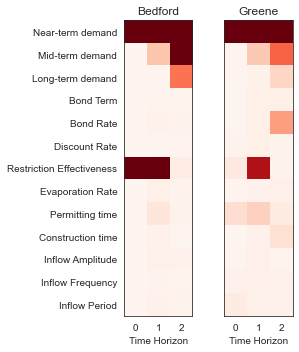

In [23]:
sns.set_style('white')
uncertainties = ['D1', 'D2', 'D3', 'BT', 'BM', 'DR', 'RE', 'EV', 'PM', 'CT', 'IA', 'IF', 'IP']
uncertainties = ['Near-term demand', 'Mid-term demand', 'Long-term demand', 'Bond Term', 'Bond Rate', 'Discount Rate', 'Restriction Effectiveness', 'Evaporation Rate', 'Permitting time', 'Construction time', 'Inflow Amplitude', 'Inflow Frequency', 'Inflow Period']


u1_st_FI = get_factor_importances(short_term_SD_input, rdm_factors, 250, 4, 5)
u1_mt_FI = get_factor_importances(mid_term_SD_input, rdm_factors, 250, 4, 5)
u1_lt_FI = get_factor_importances(long_term_SD_input, rdm_factors, 250, 4, 5)

u1_all = np.vstack([u1_st_FI,u1_mt_FI, u1_lt_FI])
u1_all = np.transpose(u1_all)

# factor ranking -- utility 2
u2_st_FI = get_factor_importances(short_term_SD_input, rdm_factors, 250, 4, 11)
u2_mt_FI = get_factor_importances(mid_term_SD_input, rdm_factors, 250, 4, 11)
u2_lt_FI = get_factor_importances(long_term_SD_input, rdm_factors, 250, 4, 11)

u2_all = np.vstack([u2_st_FI,u2_mt_FI, u2_lt_FI])
u2_all = np.transpose(u2_all)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,5))
axes[0].imshow(u1_all, cmap='Reds', vmin=0, vmax=.3)
axes[0].set_yticks(np.arange(13))
axes[0].set_yticklabels(uncertainties)
axes[0].set_xticks(np.arange(3))
axes[0].set_xlabel('Time Horizon')
axes[0].set_title('Bedford')

axes[1].imshow(u2_all, cmap='Reds', vmin=0, vmax=.3)
axes[1].set_yticks(np.arange(13))
axes[1].set_yticklabels([])
axes[1].set_xticks(np.arange(3))
axes[1].set_xlabel('Time Horizon')
axes[1].set_title('Greene')
plt.tight_layout()
plt.savefig('Factor_prioritization.png', dpi=300)
